##Importing Libraries 

In [19]:
#Importing Libraries 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import xlrd
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from seaborn import pairplot
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import kendalltau

##Saving data links

In [20]:
#Saving data link
cabdata_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
citydata_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
customerdata_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
tranx_link = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'


##Loading the data

In [21]:
#loading data
cabdata = pd.read_csv(cabdata_link)
citydata = pd.read_csv(citydata_link)
customerdata = pd.read_csv(customerdata_link)
tranxdata = pd.read_csv(tranx_link)

##Checking the data info

In [22]:
print('This is cab data dimension:')
print(cabdata.shape)

This is cab data dimension:
(359392, 7)


In [23]:
print('This is cab data type info:')
print(cabdata.info(), '\n')


print('This is cab data descriptive info:')
print(cabdata.describe(), '\n')

This is cab data type info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None 

This is cab data descriptive info:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      1

In [119]:
cabdata.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month
0,10000011,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1
1,10000012,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1
2,10000013,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1
3,10000014,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1
4,10000015,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1


In [25]:
print('This is city data dimension:')
print(citydata.shape)

This is city data dimension:
(20, 3)


In [26]:
print('This is city data type info:')
print(citydata.info(), '\n')


print('This is city data descriptive info:')
print(citydata.describe(), '\n')

This is city data type info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None 

This is city data descriptive info:
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1 



In [27]:
print('This is customer data dimension:')
print(customerdata.shape)

This is customer data dimension:
(49171, 4)


In [28]:
print('This is customer data type info:')
print(customerdata.info(), '\n')


print('This is customer data descriptive info:')
print(customerdata.describe(), '\n')


This is customer data type info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None 

This is customer data descriptive info:
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        3

In [29]:
print('This is Transaction data dimension:')
print(tranxdata.shape)

This is Transaction data dimension:
(440098, 3)


In [30]:
print('This is Transaction data type info:')
print(tranxdata.info(), '\n')


print('This is Transaction data descriptive info:')
print(tranxdata.describe(), '\n')

This is Transaction data type info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None 

This is Transaction data descriptive info:
       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000 



In [31]:
print(cabdata.isnull().sum())
print(citydata.isnull().sum())
print(customerdata.isnull().sum())
print(tranxdata.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


###The number of cities in City data and how many times they are represented.

### Replacing ',' with '' in Population and User variables in City data 

In [32]:
citydata['Population'] = citydata['Population'].str.replace(',', '')
citydata['Users'] = citydata['Users'].str.replace(',', '')

### Converting Population and Users variable in City data to integer

In [33]:
citydata[['Population', 'Users']] = citydata[['Population', 'Users']].astype(int)

### COnverting date column in Cab data to Year Month and Day format

In [34]:
cabdata.loc[:, 'Date of Travel'] = cabdata.loc[:, 'Date of Travel'].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))

In [35]:
cabdata['month'] = cabdata['Date of Travel'].dt.month

In [36]:
cabdata.loc[:, 'Date of Travel'] = cabdata['Date of Travel'].dt.year

### Replacing ' ' in data frame column names with '_'

In [37]:
cabdata.columns = [c.replace(' ', '_') for c in cabdata.columns] 
customerdata.columns = [c.replace(' ', '_') for c in customerdata.columns] 
tranxdata.columns = [c.replace(' ', '_') for c in tranxdata.columns] 

###Merging Cab data and Transaction data 

In [38]:
merged_data_df = pd.merge(cabdata,  tranxdata, how = 'outer', on = 'Transaction_ID')
merged_data_df['Profit'] = merged_data_df['Price_Charged'] - merged_data_df['Cost_of_Trip']
merged_data_df

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,Customer_ID,Payment_Mode,Profit
0,10000011,2016.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1.0,29290,Card,57.315
1,10000012,2016.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1.0,27703,Card,23.666
2,10000013,2016.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1.0,28712,Cash,27.568
3,10000014,2016.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1.0,28020,Cash,25.798
4,10000015,2016.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1.0,27182,Card,16.844
...,...,...,...,...,...,...,...,...,...,...,...
440093,10440078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51612,Cash,NaN
440094,10440091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53963,Card,NaN
440095,10440102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52526,Cash,NaN
440096,10440103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53171,Card,NaN


###Merging Customer data with the merged data

In [39]:
merged_data_df2 = pd.merge(merged_data_df, customerdata, how = 'outer', on = 'Customer_ID')
merged_data_df2.rename(columns = {'Income_(USD/Month)': 'Income'}, inplace = True)
merged_data_df2

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,Customer_ID,Payment_Mode,Profit,Gender,Age,Income
0,10000011,2016.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1.0,29290,Card,57.3150,Male,28,10813
1,10351127,2018.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7.0,29290,Cash,281.2772,Male,28,10813
2,10412921,2018.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11.0,29290,Card,194.6480,Male,28,10813
3,10000012,2016.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1.0,27703,Card,23.6660,Male,27,9237
4,10320494,2018.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4.0,27703,Card,253.9808,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382,Card,NaN,Female,51,18919
440094,10439409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420,Card,NaN,Female,18,4531
440095,10439413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888,Card,NaN,Male,23,3226
440096,10439418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456,Cash,NaN,Male,20,30662


In [40]:
datadf = pd.merge(merged_data_df2, citydata)

In [41]:
datadf

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,Customer_ID,Payment_Mode,Profit,Gender,Age,Income,Population,Users
0,10000011,2016.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1.0,29290,Card,57.3150,Male,28,10813,814885,24701
1,10351127,2018.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7.0,29290,Cash,281.2772,Male,28,10813,814885,24701
2,10412921,2018.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11.0,29290,Card,194.6480,Male,28,10813,814885,24701
3,10000012,2016.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1.0,27703,Card,23.6660,Male,27,9237,814885,24701
4,10320494,2018.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4.0,27703,Card,253.9808,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018.0,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3.0,51406,Cash,143.6180,Female,29,6829,418859,127001
359388,10319775,2018.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4.0,51406,Cash,23.0464,Female,29,6829,418859,127001
359389,10347676,2018.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,7.0,51406,Card,-5.8540,Female,29,6829,418859,127001
359390,10358624,2018.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,8.0,51406,Cash,-6.0900,Female,29,6829,418859,127001


In [42]:
datadf.isnull().sum()

Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
month             0
Customer_ID       0
Payment_Mode      0
Profit            0
Gender            0
Age               0
Income            0
Population        0
Users             0
dtype: int64

In [43]:
datadf.duplicated().sum()

0

In [44]:
datadf.describe()

,Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,month,Customer_ID,Profit,Age,Income,Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,2017.045199,22.567254,423.443311,286.190113,7.500434,19191.652115,137.253198,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,0.800239,12.233526,274.378911,157.993661,3.445095,21012.412463,160.311840,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,2016.000000,1.900000,15.600000,19.000000,1.000000,1.000000,-220.060000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,2016.000000,12.000000,206.437500,151.200000,5.000000,2705.000000,28.012000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,2017.000000,22.440000,386.360000,282.480000,8.000000,7459.000000,81.962000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,2018.000000,32.960000,583.660000,413.683200,10.000000,36078.000000,190.030000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,2018.000000,48.000000,2048.030000,691.200000,12.000000,60000.000000,1463.966000,65.000000,35000.000000,8.405837e+06,302149.000000


In [45]:
datadf.shape

(359392, 16)

In [46]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'month', 'Customer_ID', 'Payment_Mode',
       'Profit', 'Gender', 'Age', 'Income', 'Population', 'Users'],
      dtype='object')

In [47]:
datadf['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [48]:
datadf['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [49]:
datadf['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

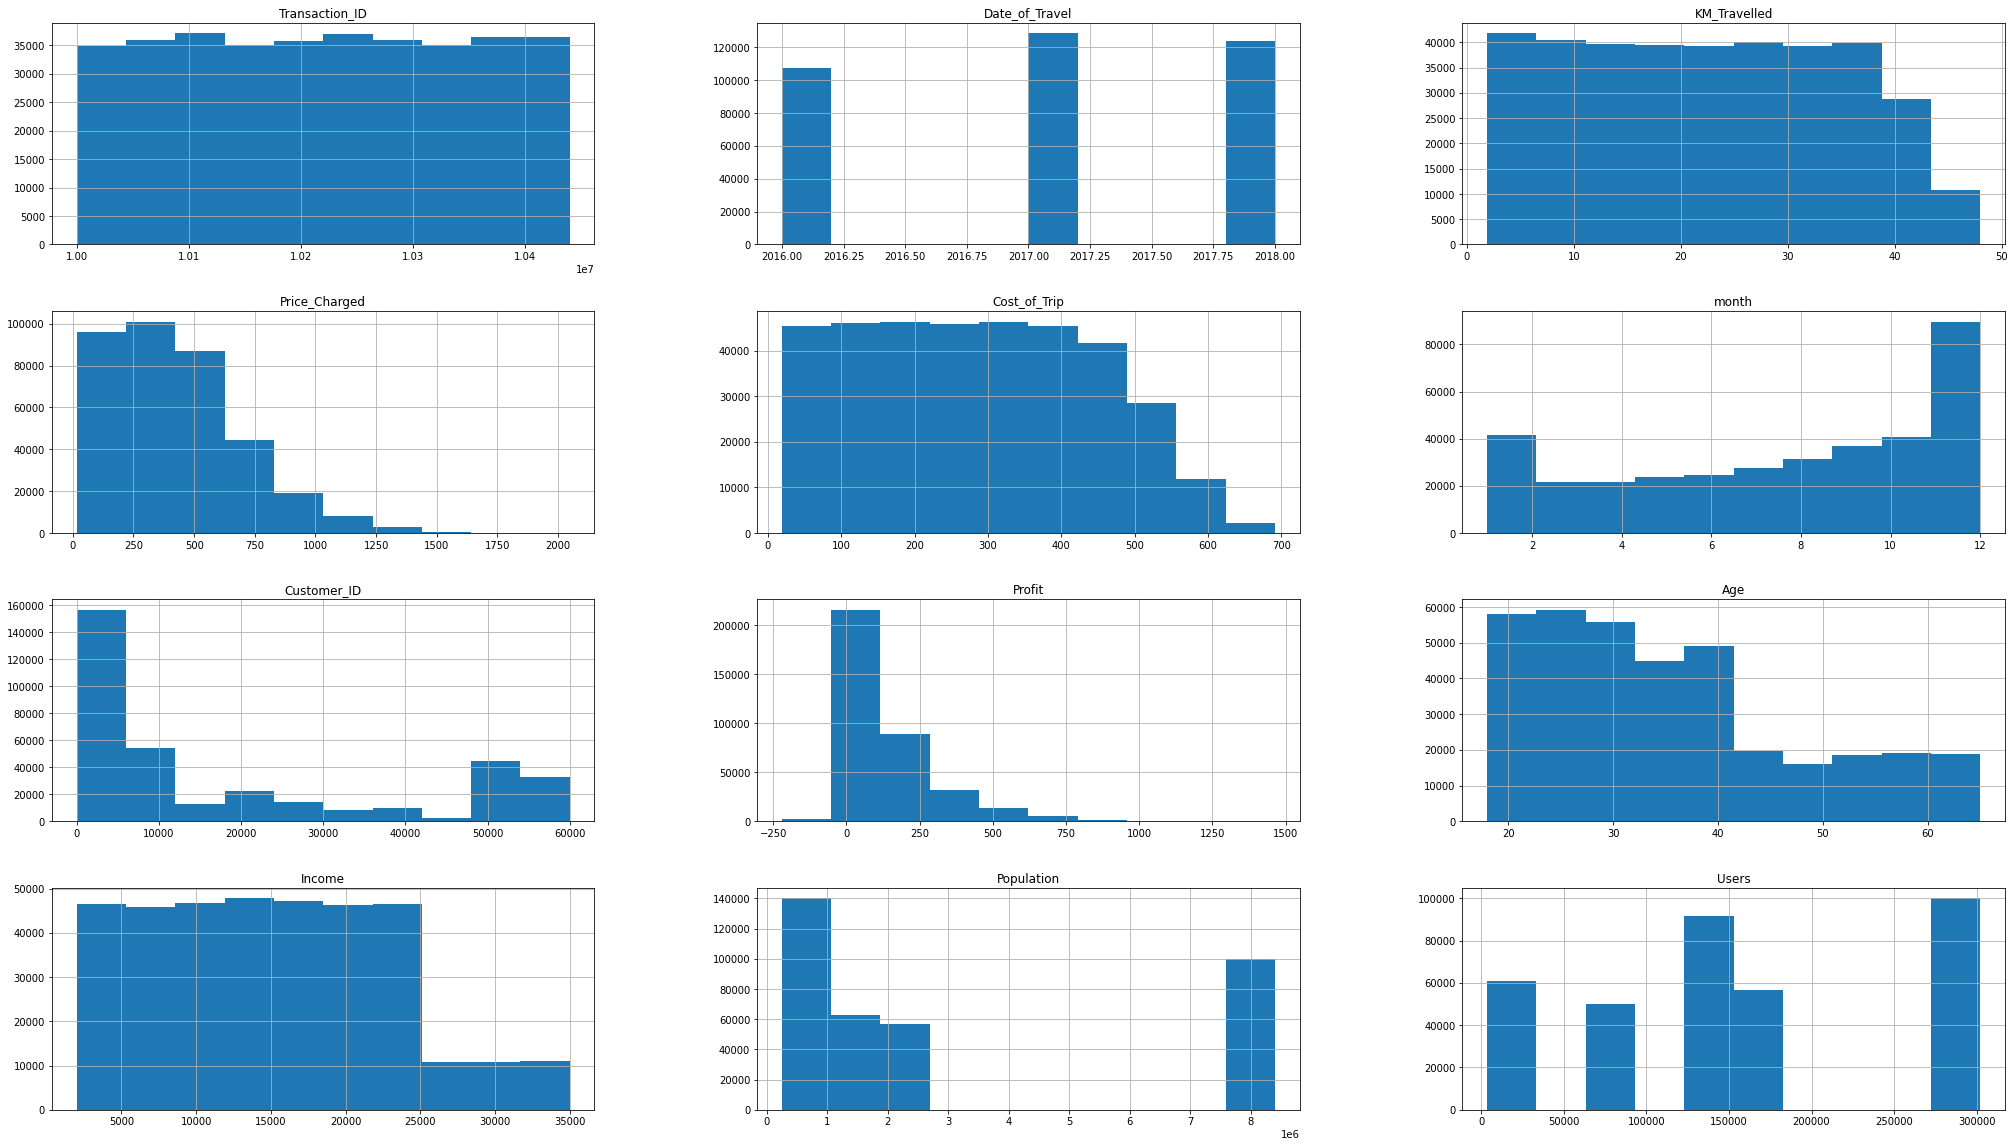

In [50]:
datadf.hist(figsize = (35,20))
plt.show()
#This shows the destribution of the data. None of the numeric variables are uniformly distributed. 

In [51]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'month', 'Customer_ID', 'Payment_Mode',
       'Profit', 'Gender', 'Age', 'Income', 'Population', 'Users'],
      dtype='object')

In [52]:
print(datadf.groupby('Company')['Profit'].mean())

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64


In [53]:
datadf_numcol = datadf.select_dtypes(np.number).copy()
datadf_numcol = datadf_numcol.drop(['Customer_ID', 'Transaction_ID'], axis = 1)

In [54]:
coeff = datadf_numcol.corr()
pval = datadf_numcol.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*coeff.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
coeff.round(4).astype(str) + p
#Source:https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,month,Profit,Age,Income,Population,Users
Date_of_Travel,1.0***,-0.0011,-0.0364***,-0.0018,-0.0305***,-0.0606***,-0.0006,-0.0016,0.0,-0.0008
KM_Travelled,-0.0011,1.0***,0.8358***,0.9818***,-0.0019,0.4628***,-0.0004,-0.0005,-0.0023,-0.0004
Price_Charged,-0.0364***,0.8358***,1.0***,0.8598***,-0.0611***,0.8642***,-0.0031*,0.0032*,0.3266***,0.2811***
Cost_of_Trip,-0.0018,0.9818***,0.8598***,1.0***,-0.0084***,0.4861***,-0.0002,-0.0006,0.0151***,0.0236***
month,-0.0305***,-0.0019,-0.0611***,-0.0084***,1.0***,-0.0964***,-0.0022,0.0003,0.0646***,0.0366***
Profit,-0.0606***,0.4628***,0.8642***,0.4861***,-0.0964***,1.0***,-0.0051***,0.0061***,0.5441***,0.4578***
Age,-0.0006,-0.0004,-0.0031*,-0.0002,-0.0022,-0.0051***,1.0***,0.0039**,-0.009***,-0.0059***
Income,-0.0016,-0.0005,0.0032*,-0.0006,0.0003,0.0061***,0.0039**,1.0***,0.0119***,0.0105***
Population,0.0,-0.0023,0.3266***,0.0151***,0.0646***,0.5441***,-0.009***,0.0119***,1.0***,0.9155***
Users,-0.0008,-0.0004,0.2811***,0.0236***,0.0366***,0.4578***,-0.0059***,0.0105***,0.9155***,1.0***


In [55]:
kendcorr = datadf_numcol.corr(method= 'kendall')
kendcorr

,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,month,Profit,Age,Income,Population,Users
Date_of_Travel,1.000000,-0.000880,-0.022611,-0.001484,-0.020879,-0.046534,-0.000253,-0.000999,0.001144,-0.000467
KM_Travelled,-0.000880,1.000000,0.719373,0.898328,-0.001117,0.342466,-0.000071,-0.000278,-0.000624,0.000388
Price_Charged,-0.022611,0.719373,1.000000,0.749388,-0.028399,0.608828,-0.001343,0.001910,0.147392,0.141022
Cost_of_Trip,-0.001484,0.898328,0.749388,1.000000,-0.005252,0.358186,0.000071,-0.000321,0.006681,0.016651
month,-0.020879,-0.001117,-0.028399,-0.005252,1.000000,-0.049632,-0.001015,0.000361,0.039583,0.020906
Profit,-0.046534,0.342466,0.608828,0.358186,-0.049632,1.000000,-0.003045,0.003733,0.281676,0.247205
Age,-0.000253,-0.000071,-0.001343,0.000071,-0.001015,-0.003045,1.000000,0.003299,-0.001123,-0.001860
Income,-0.000999,-0.000278,0.001910,-0.000321,0.000361,0.003733,0.003299,1.000000,0.010656,0.008796
Population,0.001144,-0.000624,0.147392,0.006681,0.039583,0.281676,-0.001123,0.010656,1.000000,0.749288
Users,-0.000467,0.000388,0.141022,0.016651,0.020906,0.247205,-0.001860,0.008796,0.749288,1.000000


In [56]:
print('Mean Profit: {}'.format( datadf.groupby('Company')['Profit'].mean()), '\n')
print('Maximum Profit: {}'.format( datadf.groupby('Company')['Profit'].max()), '\n')
print('Minimum Profit: {}'.format( datadf.groupby('Company')['Profit'].min()))

Mean Profit: Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64 

Maximum Profit: Company
Pink Cab      1119.480
Yellow Cab    1463.966
Name: Profit, dtype: float64 

Minimum Profit: Company
Pink Cab     -220.0600
Yellow Cab   -176.9308
Name: Profit, dtype: float64


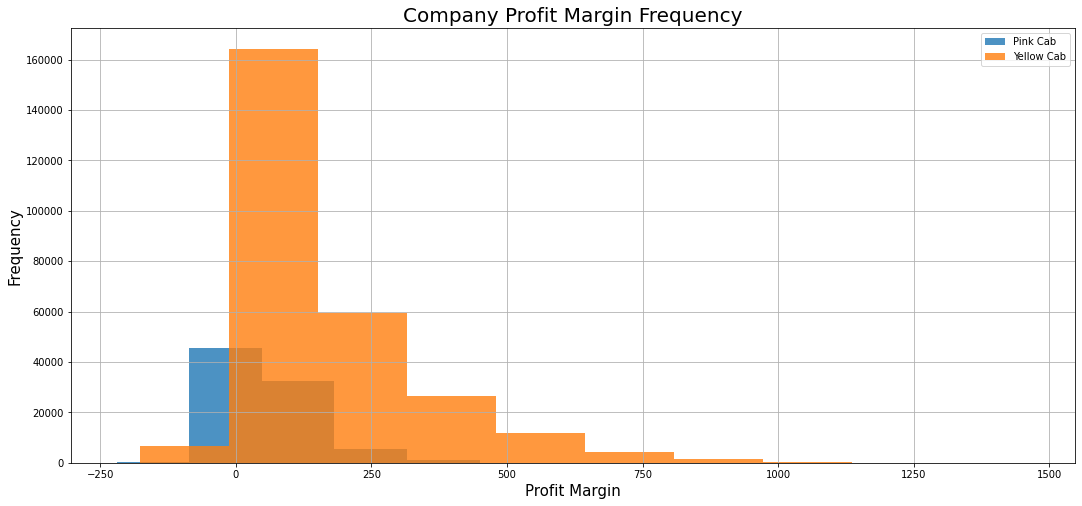

In [57]:
plt.figure(figsize = (18,8))
datadf.groupby('Company')['Profit'].hist(alpha = 0.8)
plt.xlabel("Profit Margin", size = 15)
plt.ylabel('Frequency', size = 15)
plt.title("Company Profit Margin Frequency", size = 20)
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

In [58]:
PinkCab = datadf[datadf['Company'] == 'Pink Cab']
YellowCab = datadf[datadf['Company'] == 'Yellow Cab']

In [59]:
PinkCab.rename(columns = {'Date_of_Travel': 'Year'}, inplace = True)
YellowCab.rename(columns = {'Date_of_Travel': 'Year'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


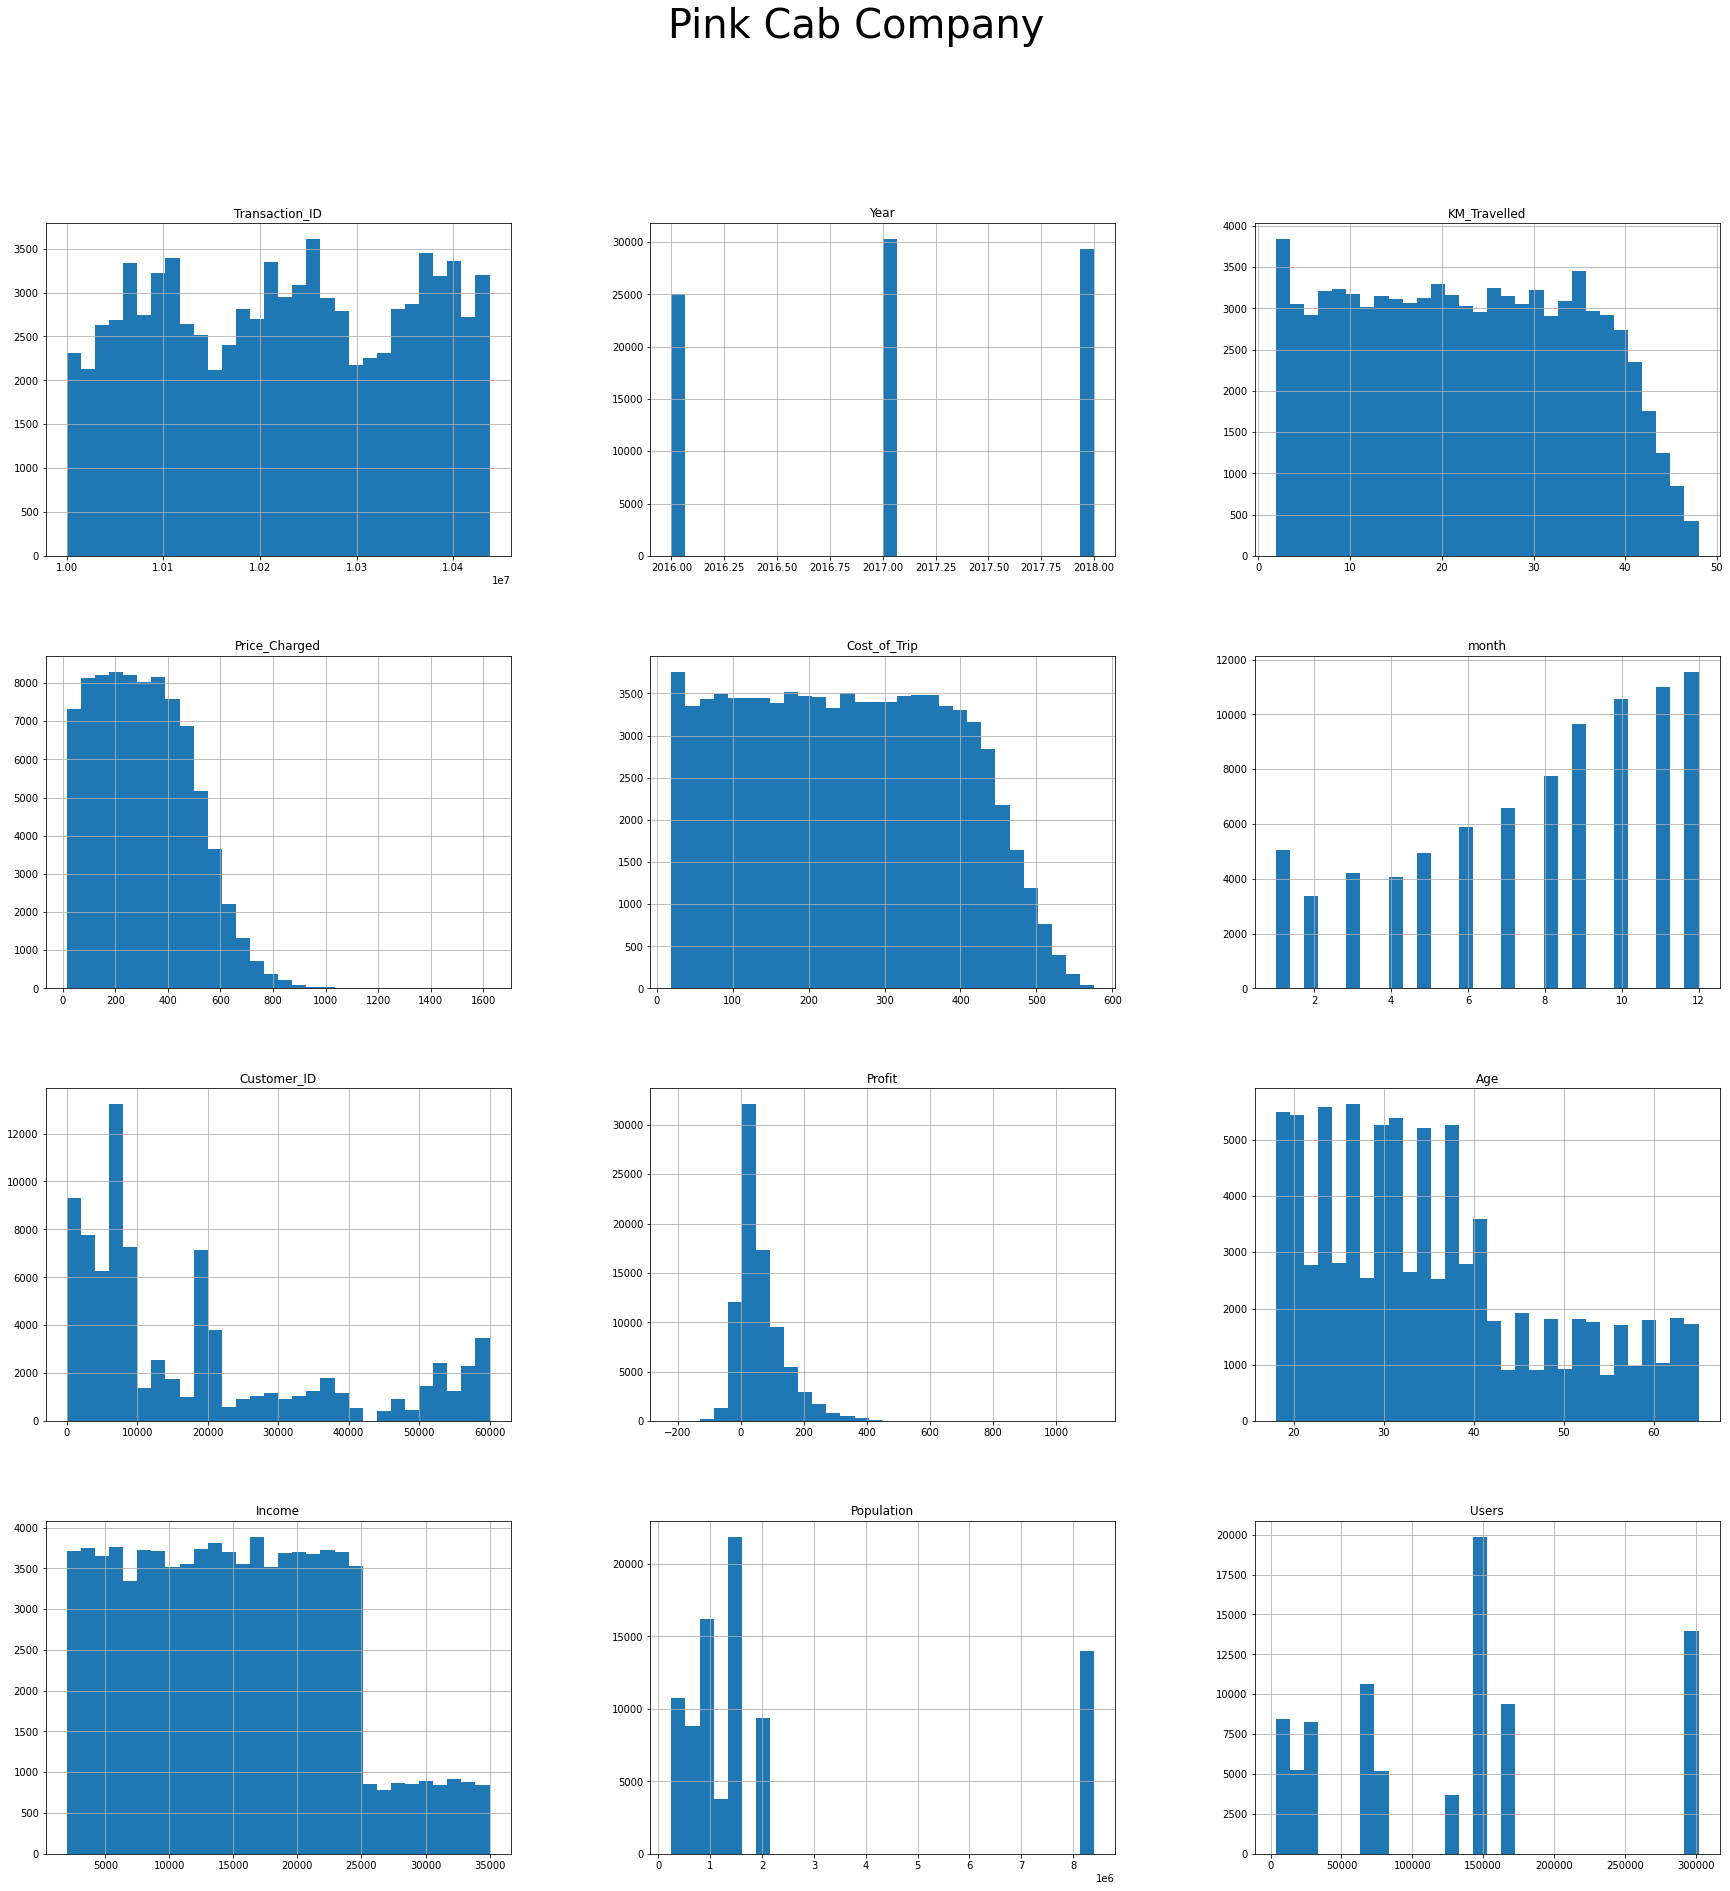

In [60]:
PinkCab.hist(figsize = (30,30), bins = 30)
plt.suptitle("Pink Cab Company", size = 40)
plt.show()

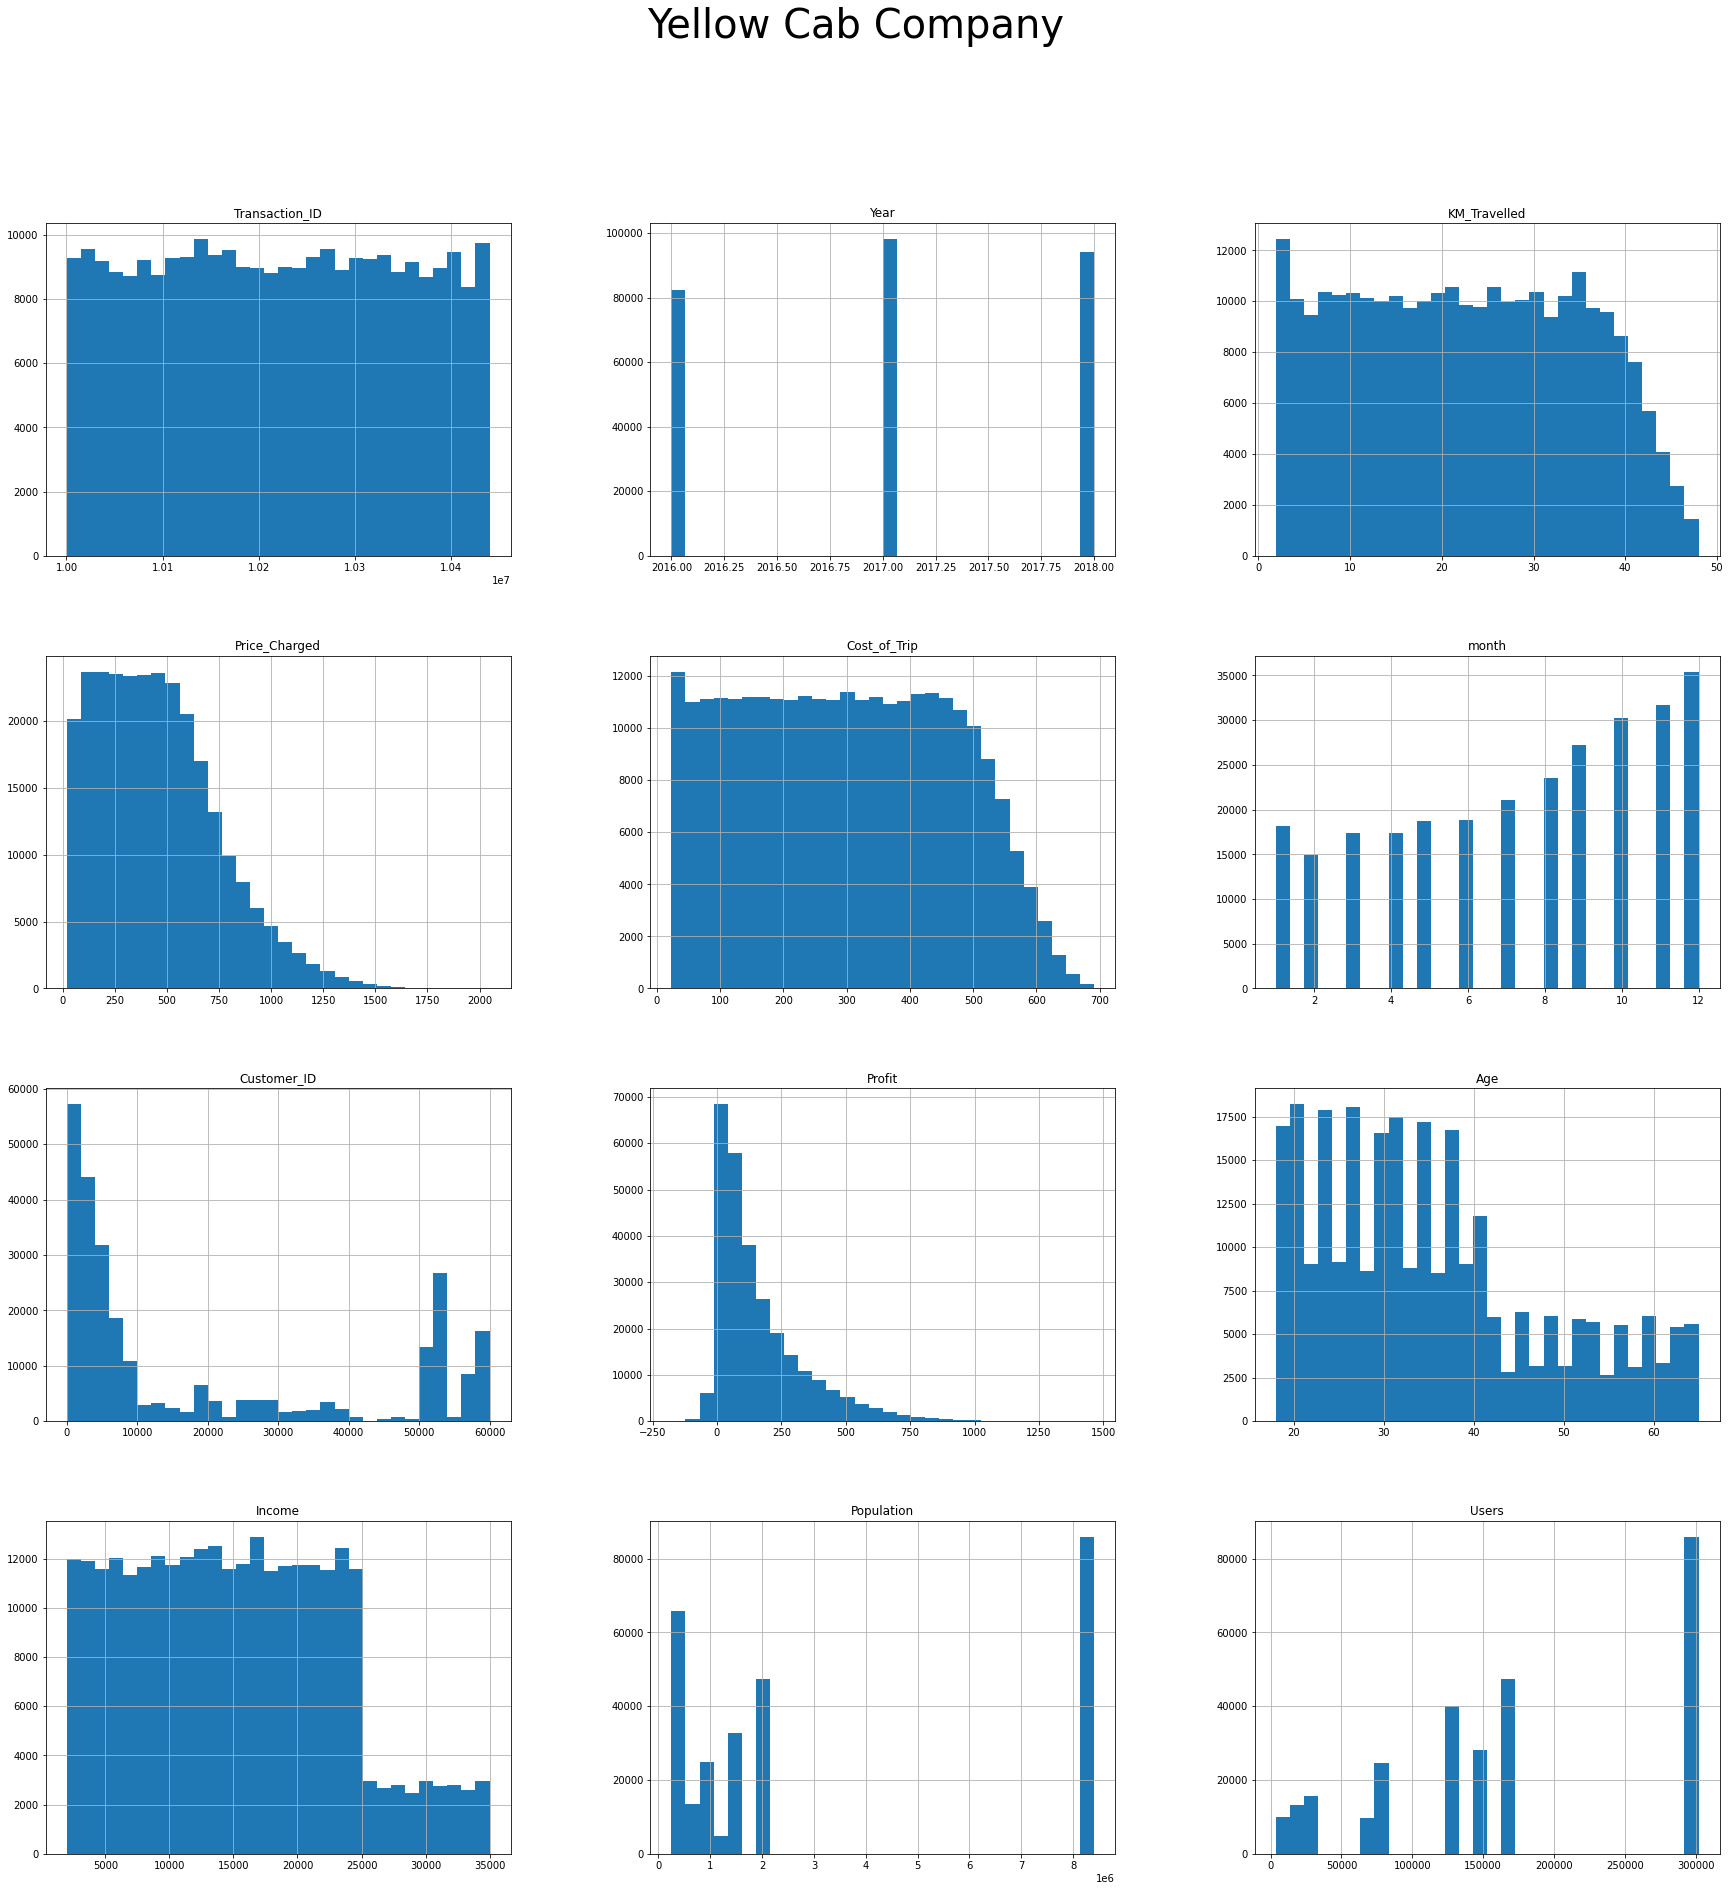

In [61]:
YellowCab.hist(figsize = (30,30), bins = 30)
plt.suptitle("Yellow Cab Company", size = 40)
plt.show()

In [62]:
bothcompany = datadf['Company'].value_counts()/datadf['Company'].size *100

Text(0.5, 1.0, 'Activities Frequency of Both Company')

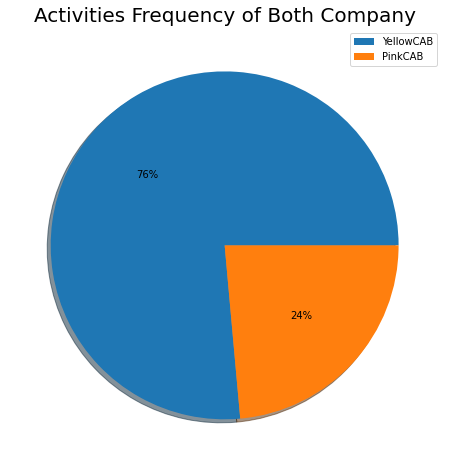

In [63]:
plt.figure(figsize = (8,8))
plt.pie(bothcompany, shadow = True,  autopct='%1.0f%%',)
plt.legend(['YellowCAB', 'PinkCAB'])
plt.title('Activities Frequency of Both Company', size = 20)

In [64]:
YellowCab['month'].value_counts()

12.0    35439
11.0    31695
10.0    30276
9.0     27201
8.0     23584
7.0     21086
6.0     18836
5.0     18741
1.0     18117
3.0     17423
4.0     17351
2.0     14932
Name: month, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


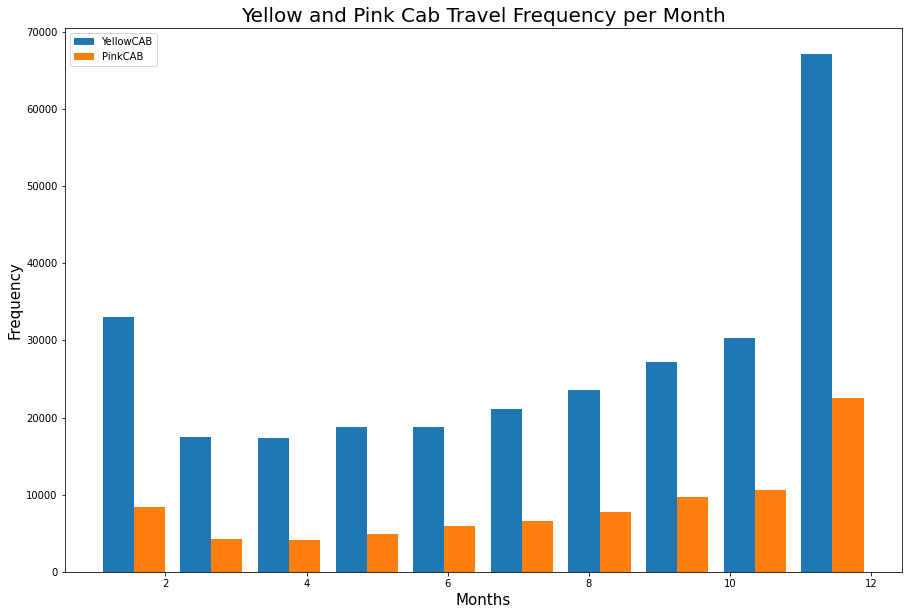

In [65]:

plt.figure(figsize = (15,10))
plt.hist([YellowCab['month'], PinkCab['month']],  label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Travel Frequency per Month', size = 20)
plt.xlabel("Months", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


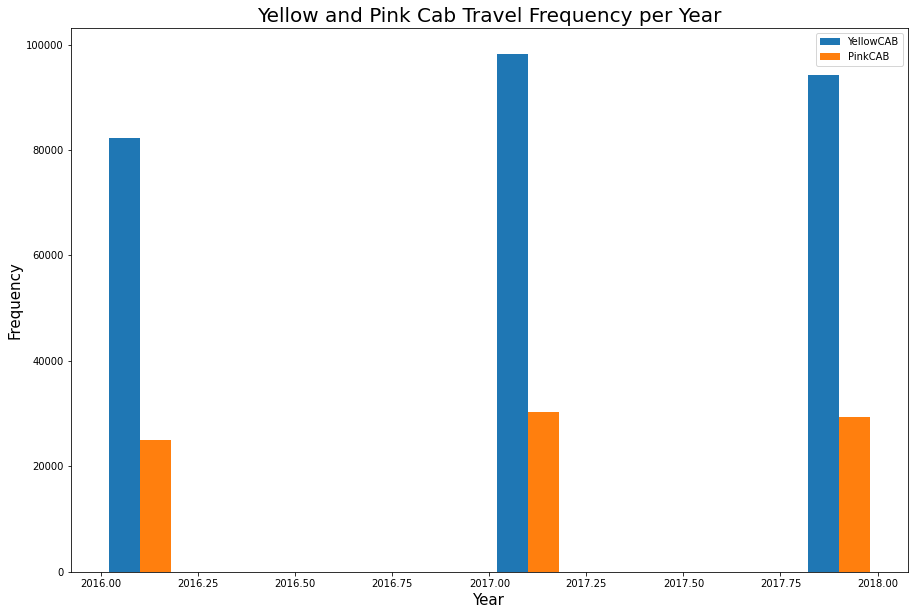

In [66]:

plt.figure(figsize = (15,10))
plt.hist([YellowCab['Year'], PinkCab['Year']], label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Travel Frequency per Year', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

In [67]:
YellowCab['Profit'].max()

1463.9660000000003

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


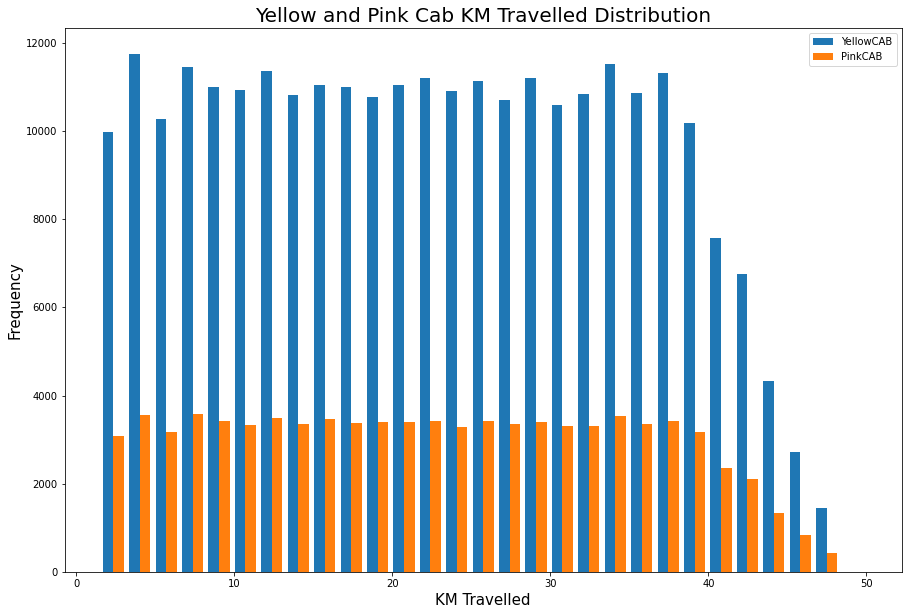

In [68]:
bins = np.linspace(1.5, 50, 30)
plt.figure(figsize = (15,10))
plt.hist([YellowCab['KM_Travelled'], PinkCab['KM_Travelled']], bins, label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab KM Travelled Distribution', size = 20)
plt.xlabel("KM Travelled", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


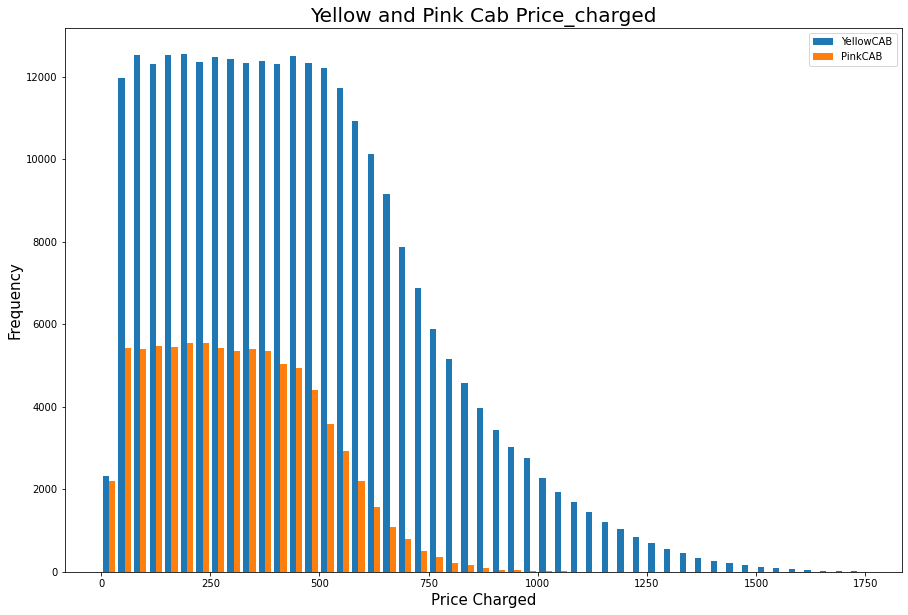

In [69]:
bins = np.linspace(0, 1750, 50)
plt.figure(figsize = (15,10))
plt.hist([YellowCab['Price_Charged'], PinkCab['Price_Charged']], bins, label=['YellowCAB', 'PinkCAB'])
plt.title('Yellow and Pink Cab Price_charged', size = 20)
plt.xlabel("Price Charged", size = 15)
plt.ylabel('Frequency', size = 15)
plt.legend()

In [70]:
sum(YellowCab['Customer_ID'].value_counts() > 1)

27865

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


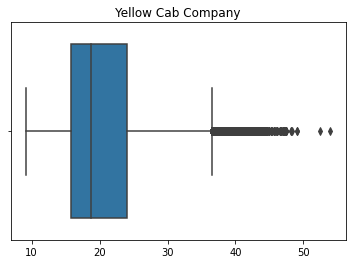

In [71]:
sns.boxplot((YellowCab['Price_Charged']/YellowCab['KM_Travelled']))
plt.title('Yellow Cab Company')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


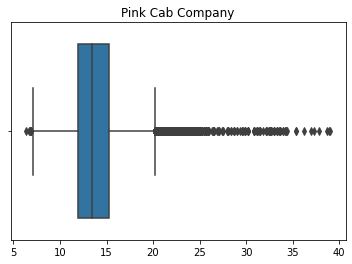

In [72]:
sns.boxplot(PinkCab['Price_Charged']/PinkCab['KM_Travelled'])
plt.title('Pink Cab Company')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


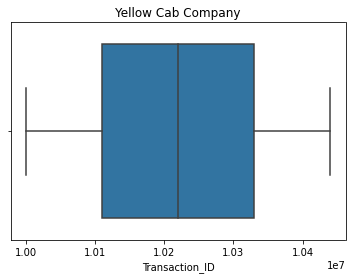

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


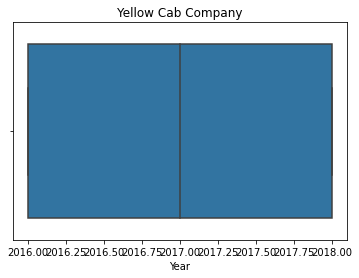

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


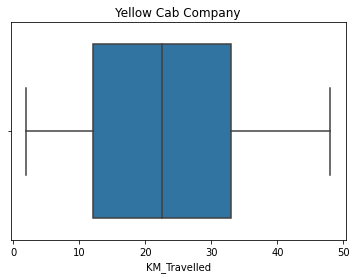

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


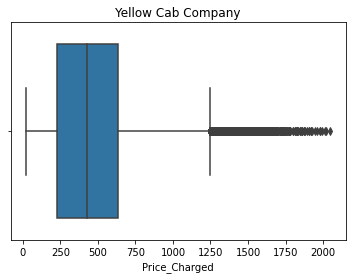

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


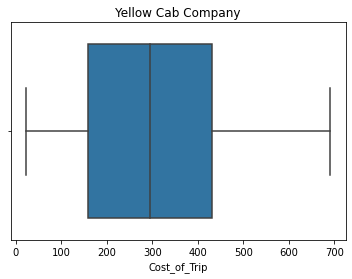

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


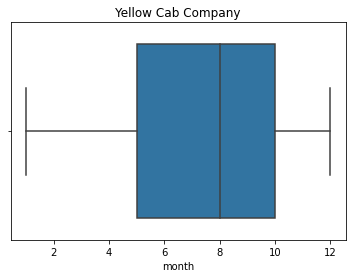

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


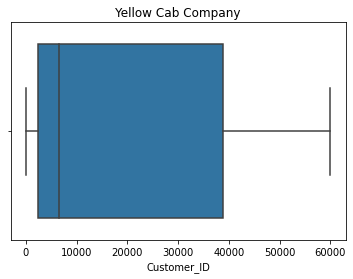

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


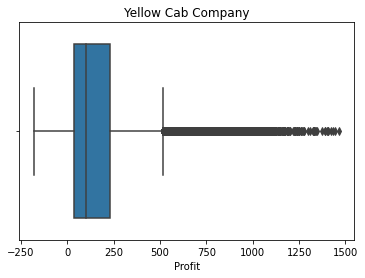

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


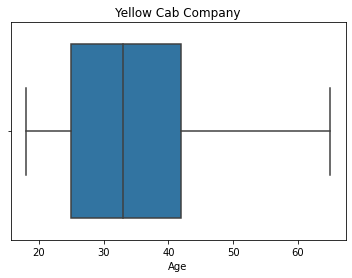

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


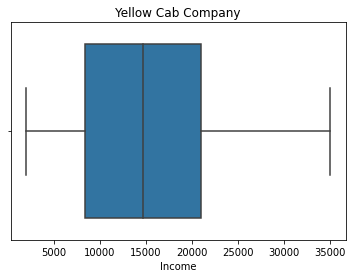

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


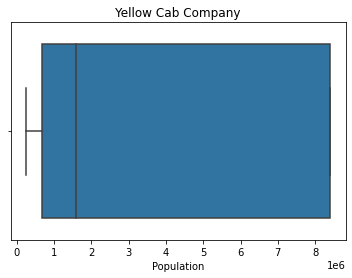

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


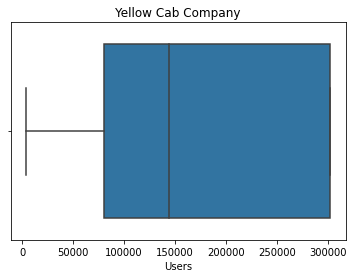

In [73]:
Yellow_num2= YellowCab.select_dtypes(include = np.number).copy()
for x in Yellow_num2: 
  sns.boxplot(Yellow_num2.loc[:,x])
  plt.title('Yellow Cab Company')
  plt.show()


In [ ]:
Pink_num2= PinkCab.select_dtypes(include = np.number).copy()
for x in Pink_num2: 
  sns.boxplot(Pink_num2.loc[:,x])
  plt.title('Pink Cab Company')
  plt.show()

In [75]:
PinkCab_numcol = PinkCab.select_dtypes(np.number).copy()
PinkCab_numcol = PinkCab_numcol.drop(['Customer_ID', 'Transaction_ID'], axis = 1)
YellowCab_numcol = YellowCab.select_dtypes(np.number).copy()
YellowCab_numcol = YellowCab_numcol.drop(['Customer_ID', 'Transaction_ID'], axis = 1)

In [ ]:
pinkcorr = PinkCab_numcol.corr()
yellowcorr = YellowCab_numcol.corr()



yelpval = YellowCab_numcol.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*yellowcorr.shape)
yp = yelpval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
yellowcorr.round(4).astype(str) + yp

#Source:https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

In [ ]:
pinkpval = pinkcorr.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*pinkcorr.shape)
pp = pinkpval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
pinkcorr.round(4).astype(str) + pp
#Source:https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

In [78]:
def datanorm(df): 
  num = df.select_dtypes(include = [np.number]).copy()
  df_num = ((num - num.min()))/((num.max() - num.min()))
  return df_num

In [79]:
yellownorm = datanorm(YellowCab)
pinknorm = datanorm(PinkCab)

In [80]:
yellownorm['Year'] =  YellowCab['Year']
yellownorm['month'] =  YellowCab[ 'month']

In [81]:
pinknorm['Year'] =  PinkCab['Year']
pinknorm['month'] =  PinkCab['month']

In [82]:
YellowCab_X = yellownorm.drop(['Price_Charged', 'Transaction_ID',  'Profit', 'Customer_ID'], axis=1)
YellowCab_y = yellownorm['Profit'].copy()

In [83]:
PinkCab_X = pinknorm.drop(['Price_Charged', 'Transaction_ID','Profit', 'Customer_ID'], axis=1)
PinkCab_y = pinknorm['Profit'].copy()

In [136]:
from sklearn.model_selection import train_test_split
from sklearn import svm, feature_selection, linear_model
def selectedX(x,y): 
  estimator = linear_model.LinearRegression()
  selector = feature_selection.RFE(estimator, n_features_to_select=7, verbose=0, step=1)
  selector = selector.fit(x,y)
  selected_features = YellowCab_X.loc[:, selector.support_]
  return(selected_features)

In [137]:
yellowselect = selectedX(YellowCab_X, YellowCab_y)


In [138]:
pinkselect = selectedX(PinkCab_X, PinkCab_y)

In [140]:
yellowselect

,Year,KM_Travelled,Cost_of_Trip,month,Income,Population,Users
1,2018.0,0.526898,0.440788,7.0,0.267093,0.069379,0.070545
2,2018.0,0.881779,0.859668,11.0,0.267093,0.069379,0.070545
4,2018.0,0.747939,0.664750,4.0,0.219330,0.069379,0.070545
5,2018.0,0.092842,0.096811,5.0,0.219330,0.069379,0.070545
8,2016.0,0.817787,0.705278,9.0,0.280095,0.069379,0.070545
...,...,...,...,...,...,...,...
359387,2018.0,0.791757,0.751813,3.0,0.146351,0.020828,0.413251
359388,2018.0,0.036226,0.032546,4.0,0.146351,0.020828,0.413251
359389,2018.0,0.467679,0.471311,7.0,0.146351,0.020828,0.413251
359390,2018.0,0.557484,0.510952,8.0,0.146351,0.020828,0.413251


In [87]:
pinkselects = pinknorm[pinkselect.columns]

In [88]:
pinkselect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 1 to 359391
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          274681 non-null  float64
 1   KM_Travelled  274681 non-null  float64
 2   Cost_of_Trip  274681 non-null  float64
 3   month         274681 non-null  float64
 4   Age           274681 non-null  float64
 5   Population    274681 non-null  float64
 6   Users         274681 non-null  float64
dtypes: float64(7)
memory usage: 16.8 MB


In [89]:
#Beacuase profit is high correlated with Cost of Trip, it causes multicolinearity
yellowselect 

,Year,KM_Travelled,Cost_of_Trip,month,Income,Population,Users
1,2018.0,0.526898,0.440788,7.0,0.267093,0.069379,0.070545
2,2018.0,0.881779,0.859668,11.0,0.267093,0.069379,0.070545
4,2018.0,0.747939,0.664750,4.0,0.219330,0.069379,0.070545
5,2018.0,0.092842,0.096811,5.0,0.219330,0.069379,0.070545
8,2016.0,0.817787,0.705278,9.0,0.280095,0.069379,0.070545
...,...,...,...,...,...,...,...
359387,2018.0,0.791757,0.751813,3.0,0.146351,0.020828,0.413251
359388,2018.0,0.036226,0.032546,4.0,0.146351,0.020828,0.413251
359389,2018.0,0.467679,0.471311,7.0,0.146351,0.020828,0.413251
359390,2018.0,0.557484,0.510952,8.0,0.146351,0.020828,0.413251


In [90]:
trainX, testX, trainY, testY = train_test_split(yellowselect, YellowCab_y, test_size=0.2)
lm = linear_model.LinearRegression()
lm.fit(trainX, trainY)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm.intercept_))
print("Weight coefficients:")
for feat, coef in zip(yellowselect, lm.coef_):
    print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX, trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))

Y-axis intercept 17.2252
Weight coefficients:
                 Year: -0.0085
         KM_Travelled: 0.5741
         Cost_of_Trip: -0.4119
                month: -0.0047
               Income: -0.0001
           Population: 0.2303
                Users: -0.1155
R squared for the training data is 0.640
Score against test data: 0.643


In [91]:
sum(YellowCab_y)

56444.68454420752

In [92]:
print('Yellow Cab Company Forecasted profit: {}'.format(((sum(lm.predict(yellowselect)) - (sum(YellowCab_y))) /  (sum(YellowCab_y)))  * 100))

Yellow Cab Company Forecasted profit: -0.013371662531638849


In [93]:
(((sum(lm.predict(yellowselect))) - (sum(YellowCab_y)))/ sum(YellowCab_y)) * 100

-0.013371662531638849

In [94]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Profit ~ Year	+ KM_Travelled	+ Cost_of_Trip +	month 	+ Income + Population	+ Users', data=yellownorm).fit()
print(model.params)
print('R squared is: ', model.rsquared)
model.summary()

Intercept       17.416524
Year            -0.008571
KM_Travelled     0.572665
Cost_of_Trip    -0.410065
month           -0.004756
Income          -0.000258
Population       0.230478
Users           -0.115600
dtype: float64
R squared is:  0.6407508858875939


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 6.999e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:36:15   Log-Likelihood:             3.7067e+05
No. Observations:              274681   AIC:                        -7.413e+05
Df Residuals:                  274673   BIC:                        -7.412e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.4165      0.302     57.685      0.000      16.825      18.008
Year            -0.0086      0.000    -57.262      0.000      -0.009      -0.008
KM_Travelled     0.5727      0.004    145.674      0.000       0.565       0.580
Cost_of_Trip    -0.4101      0.004    -95.588      0.000      -0.418      -0.402
month           -0.0048   3.47e-05   -137.206      0.000      -0.005      -0.005
Income          -0.0003      0.000     -0.521      0.603      -0.001       0.001
Population       0.2305      0.001    309.861      0.000       0.229       0.232
Users           -0.1156      0.001   -124.374      0.000      -0.117      -0.114
==============================================================================
Omnibus:                    50674.954   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185952.238
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       6.604   Cond. No.                     5.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
trainX, testX, trainY, testY = train_test_split(pinkselects, PinkCab_y, test_size=0.2)
lm2 = linear_model.LinearRegression()
lm2.fit(trainX, trainY)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm.intercept_))
print("Weight coefficients:")
for feat, coef in zip(pinkselect, lm.coef_):
    print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX, trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))

Y-axis intercept 17.2252
Weight coefficients:
                 Year: -0.0085
         KM_Travelled: 0.5741
         Cost_of_Trip: -0.4119
                month: -0.0047
                  Age: -0.0001
           Population: 0.2303
                Users: -0.1155
R squared for the training data is -0.406
Score against test data: -0.424


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
Feature names seen at fit time, yet now missing:
- Income

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
Feature names seen at fit time, yet now missing:
- Income

  warnings.warn(message, FutureWarning)


In [96]:
print('Pink Cab Company Forecasted profit: {}'.format(((sum(lm2.predict(pinkselects)) - sum(PinkCab_y))/ (sum(PinkCab_y))) * 100))

Pink Cab Company Forecasted profit: -0.013855923821378742


In [97]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Price_Charged ~ Year	+ KM_Travelled	+ Cost_of_Trip +	month 	+ Age + Population	+ Users', data=pinknorm).fit()
print(model.params)
print('R squared is: ', model.rsquared)
model.summary()

Intercept       9.641928
Year           -0.004781
KM_Travelled    0.386462
Cost_of_Trip    0.010286
month           0.000554
Age            -0.000481
Population      0.056707
Users          -0.024813
dtype: float64
R squared is:  0.8749412452229592


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 8.466e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:36:15   Log-Likelihood:             1.5242e+05
No. Observations:               84711   AIC:                        -3.048e+05
Df Residuals:                   84703   BIC:                        -3.047e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6419      0.347     27.772      0.000       8.961      10.322
Year            -0.0048      0.000    -27.780      0.000      -0.005      -0.004
KM_Travelled     0.3865      0.005     85.720      0.000       0.378       0.395
Cost_of_Trip     0.0103      0.005      2.090      0.037       0.001       0.020
month            0.0006   4.14e-05     13.388      0.000       0.000       0.001
Age             -0.0005      0.001     -0.940      0.347      -0.001       0.001
Population       0.0567      0.001     64.008      0.000       0.055       0.058
Users           -0.0248      0.001    -26.528      0.000      -0.027      -0.023
==============================================================================
Omnibus:                    28357.610   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           313866.134
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                      12.069   Cond. No.                     5.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
datadf3 = datadf.copy()

In [143]:
datadf3.loc[:,'Gender'][datadf3.loc[:,'Gender'] == 'Male'] = 1
datadf3.loc[:,'Gender'][datadf3.loc[:,'Gender'] == 'Female'] = 0
datadf3.loc[:,'Payment_Mode'][datadf3.loc[:,'Payment_Mode'] == 'Card'] = 1
datadf3.loc[:,'Payment_Mode'][datadf3.loc[:,'Payment_Mode'] == 'Cash'] = 0
datadf3.loc[:,'Company'][datadf3.loc[:,'Company'] == 'Pink Cab'] = 1
datadf3.loc[:,'Company'][datadf3.loc[:,'Company'] == 'Yellow Cab'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [100]:
#datadf3num = datadf3.select_dtypes(include = np.number).copy()

In [101]:
#datadf3norm = (datadf3num - datadf3num.min())/ (datadf3num.max() - datadf3num.min())

In [102]:
#datadf3.loc[:, datadf3num.columns] = datadf3norm

In [144]:
datadf3 = pd.get_dummies(datadf3, columns  = ['City'])

In [146]:
X = datadf3.select_dtypes(include=[np.number]).copy()
scaler = StandardScaler()

X0 = scaler.fit_transform(X)
X0 =  pd.DataFrame(X0, index=X.index, columns=X.columns)
Y0 = datadf3['Company'].astype('int')

In [147]:
X0['Date_of_Travel'] =  datadf['Date_of_Travel']
X0['month'] =  datadf[ 'month']
X0 = X0.drop([  'Transaction_ID', 'Customer_ID'], axis = 1)

0    0.764294
1    0.235706
Name: Company, dtype: float64


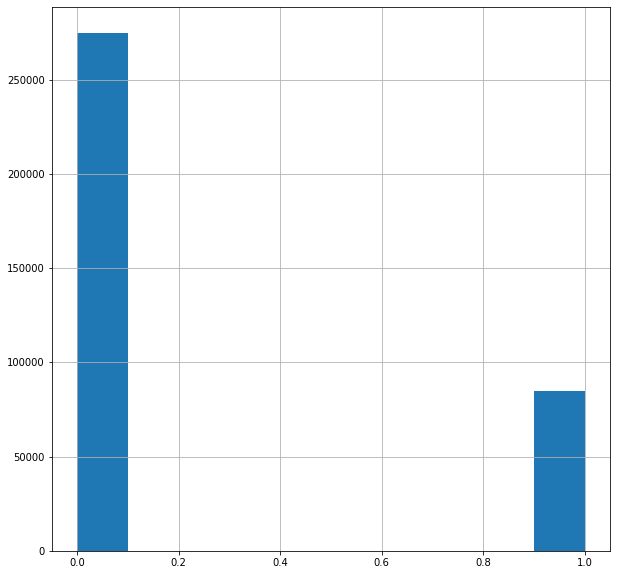

In [148]:
#Showing the percentage of the responses
print(Y0.value_counts()/Y0.size)

Y0.hist(figsize = (10,10))
plt.show()

In [154]:
grouped = datadf3.groupby('Company').mean() 
grouped

,Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,month,Customer_ID,Profit,Age,Income,...,City_NEW YORK NY,City_ORANGE COUNTY,City_PHOENIX AZ,City_PITTSBURGH PA,City_SACRAMENTO CA,City_SAN DIEGO CA,City_SEATTLE WA,City_SILICON VALLEY,City_TUCSON AZ,City_WASHINGTON DC
Company,,,,,,,,,,,,,,,,,,,,,
0,1.021978e+07,2017.043738,22.569517,458.181990,297.922004,7.40543,19428.831732,160.259986,35.341112,15045.669817,...,0.312792,0.008989,0.004369,0.002297,0.003761,0.035736,0.019168,0.017191,0.004121,0.145787
1,1.022394e+07,2017.049934,22.559917,310.800856,248.148682,7.80849,18422.581577,62.652174,35.322414,15059.047137,...,0.164878,0.017861,0.010199,0.008051,0.015748,0.125981,0.032251,0.044823,0.009432,0.043583


,Price_Charged,Cost_of_Trip,Profit,Age
Company,,,,
0,458.181990,297.922004,160.259986,35.341112
1,310.800856,248.148682,62.652174,35.322414


In [ ]:
for x in grouped.loc[:,('Price_Charged', 'Cost_of_Trip', 'Profit', 'Age')]: 
  plt.figure(figsize = (8,8))
  plt.pie(datadf3.groupby('Company').mean()[x], shadow = True,  autopct='%1.0f%%',)
  plt.legend(['YellowCAB', 'PinkCAB'])
  plt.title(x, size = 20)

In [159]:
import statsmodels.api as sm
logit_model=sm.Logit(Y0,X0)
result=logit_model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.015047
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                Company   No. Observations:               359392
Model:                          Logit   Df Residuals:                   359367
Method:                           MLE   Df Model:                           24
Date:                Thu, 23 Jun 2022   Pseudo R-squ.:                  0.9724
Time:                        18:15:36   Log-Likelihood:                -5407.8
converged:                      False   LL-Null:                   -1.9626e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Date_of_Travel         -0.3549      0.030    -11.663      0.000      -0.414      -0.295
KM_Travelled         6810.2242    585.644     11.629      0.000    5662.383    7958.065
Price_Charged   

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [109]:
logit_model

In [160]:
model = linear_model.LinearRegression()
selected = feature_selection.RFE(model, n_features_to_select=7, verbose=0, step=1)
selected = selected.fit(X0, Y0)
r_features = X0.loc[:, selected.support_]
print("R features are:\n{}".format(','.join(list(r_features))))

R features are:
Price_Charged,Cost_of_Trip,Profit,Population,Users,City_LOS ANGELES CA,City_SAN DIEGO CA


In [161]:
X2 = r_features
Y = Y0
trainX, testX, trainY, testY = train_test_split(X2, Y, test_size=0.3, random_state=0)
model = linear_model.LogisticRegression()
model.fit(trainX, trainY)
print("Score from training data: {}".format(model.score(trainX, trainY)))
print("Score from test data: {}".format(model.score(testX, testY)))
print("Intercept:\n {}".format(model.intercept_))
print("Coefficients:\n")
for feat2, coef2 in zip(X2, model.coef_[0]):
    print(" {:>20}: {}".format(feat2, coef2))

Score from training data: 0.7897079984418104
Score from test data: 0.7908512493275706
Intercept:
 [-1.62284602]
Coefficients:

        Price_Charged: -0.48168410092685415
         Cost_of_Trip: 0.4542841322736529
               Profit: -1.272132944346992
           Population: 1.8033398501791618
                Users: -1.5237515816498781
  City_LOS ANGELES CA: 0.5729970960379309
    City_SAN DIEGO CA: 0.29281398074661175


In [ ]:
#This shows that every unit increase in the profit variable increases teh chances of selecting '0' (Yellow Cab) from variable Company
#Considering that the accuracy value of the test and training data is close and high enough, we can say that the model is good. 

In [162]:
predicted = model.predict(testX)
print("Mean hits: {}".format(np.mean(predicted==testY)))

Mean hits: 0.7908512493275706


In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(testY, predicted)
print(confusion_matrix2)

[[77497  5036]
 [17514  7771]]


### Anova analysis for variables KM_travelled, Company and City in Cab data 

In [114]:
YellowCab.columns

Index(['Transaction_ID', 'Year', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'month', 'Customer_ID', 'Payment_Mode',
       'Profit', 'Gender', 'Age', 'Income', 'Population', 'Users'],
      dtype='object')

In [115]:
yelcabmod2 = ols('KM_Travelled~City+Gender + Payment_Mode', data = YellowCab).fit()
yelcabaov2 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov2)

                    df        sum_sq     mean_sq         F    PR(>F)
City              18.0  2.988610e+03  166.033892  1.109275  0.334691
Gender             1.0  6.965479e+01   69.654788  0.465365  0.495128
Payment_Mode       1.0  1.957596e-02    0.019576  0.000131  0.990875
Residual      274660.0  4.111051e+07  149.677807       NaN       NaN


In [116]:
pinkcabmod2 = ols('KM_Travelled~City+Gender + Payment_Mode', data = PinkCab).fit()
pinkcabaov2 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov2)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.596941e+03  144.274485  0.964388  0.498578
Gender            1.0  4.964314e+01   49.643143  0.331834  0.564582
Payment_Mode      1.0  1.269877e+02  126.987678  0.848836  0.356885
Residual      84690.0  1.266981e+07  149.602191       NaN       NaN


### Anova analysis for variables Cost of Trip, Company and City in Cab data 

In [117]:
pinkcabmod3 = ols('Profit~City+Gender + Payment_Mode', data = PinkCab).fit()
pinkcabaov3 = sm.stats.anova_lm(pinkcabmod3, type =2 )
print(pinkcabaov3)

                   df        sum_sq       mean_sq           F    PR(>F)
City             18.0  5.174505e+07  2.874725e+06  531.306924  0.000000
Gender            1.0  7.939247e+02  7.939247e+02    0.146733  0.701678
Payment_Mode      1.0  1.579061e+03  1.579061e+03    0.291842  0.589044
Residual      84690.0  4.582294e+08  5.410667e+03         NaN       NaN


In [118]:
yelcabmod3 = ols('Profit~City+Gender + Payment_Mode', data = YellowCab).fit()
yelcabaov3 = sm.stats.anova_lm(pinkcabmod3, type =2 )
print(yelcabaov3)

                   df        sum_sq       mean_sq           F    PR(>F)
City             18.0  5.174505e+07  2.874725e+06  531.306924  0.000000
Gender            1.0  7.939247e+02  7.939247e+02    0.146733  0.701678
Payment_Mode      1.0  1.579061e+03  1.579061e+03    0.291842  0.589044
Residual      84690.0  4.582294e+08  5.410667e+03         NaN       NaN
